ANALYZE AND VISUVALIZE SENTIMENT PATTERNS IN SOCIAL MEDIA DATA TO UNDERSTAND PUBLIC OPINION AND ATTITUDE TOWARDS SPECIFIC TOPICS OR BRANDS

IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt

In [3]:
from textblob import TextBlob

LOADING THE DATA

In [4]:
column_names = ['id', 'product', 'sentiment', 'text']

In [5]:
tweets=pd.read_csv('twitter_training.csv', names=column_names)

In [6]:
tweets.head()

,id,product,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
tweets.isnull().sum()

id             0
product        0
sentiment      0
text         686
dtype: int64

ANALYSIS AND VISUVALIZATION

Sentiment Distribution

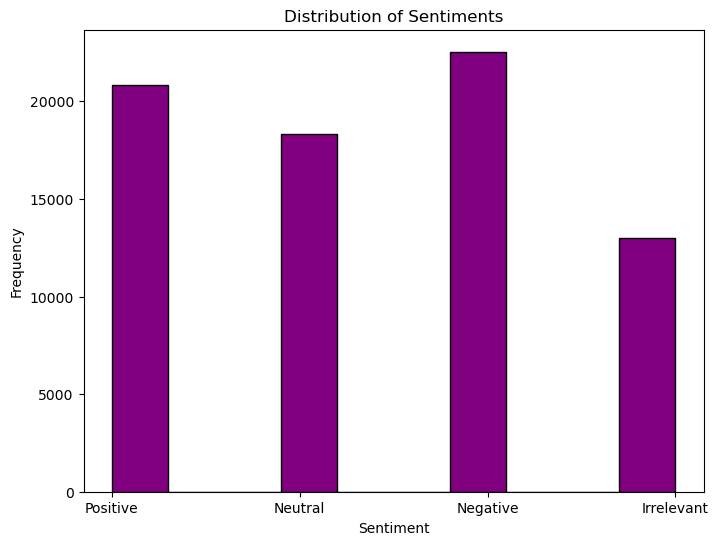

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(tweets['sentiment'], color='purple', edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments')
plt.show()

Sentiment Piechart

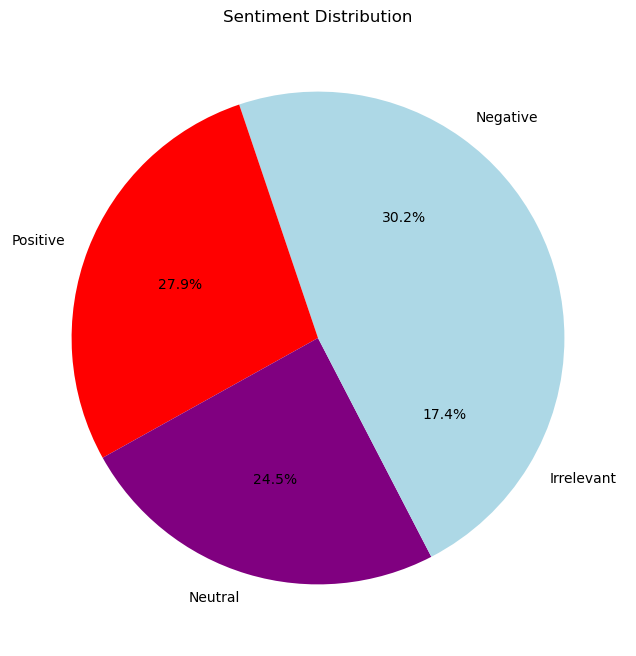

In [9]:
sentiment_counts = tweets['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightblue', 'red', 'purple'])
plt.title('Sentiment Distribution')
plt.show()

AVERAGE SENTIMENT OVER CATEGORIES

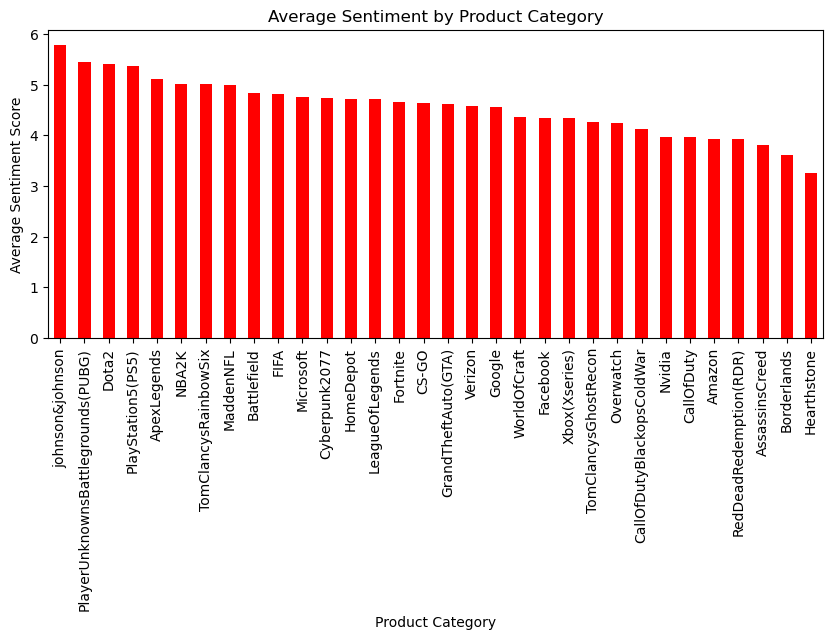

In [14]:
average_sentiment_by_category = tweets.groupby('product')['sentiment'].value_counts().unstack().mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
average_sentiment_by_category.plot(kind='bar', color='red')
plt.xlabel('Product Category')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment by Product Category')
plt.show()

Sentiment Overtime

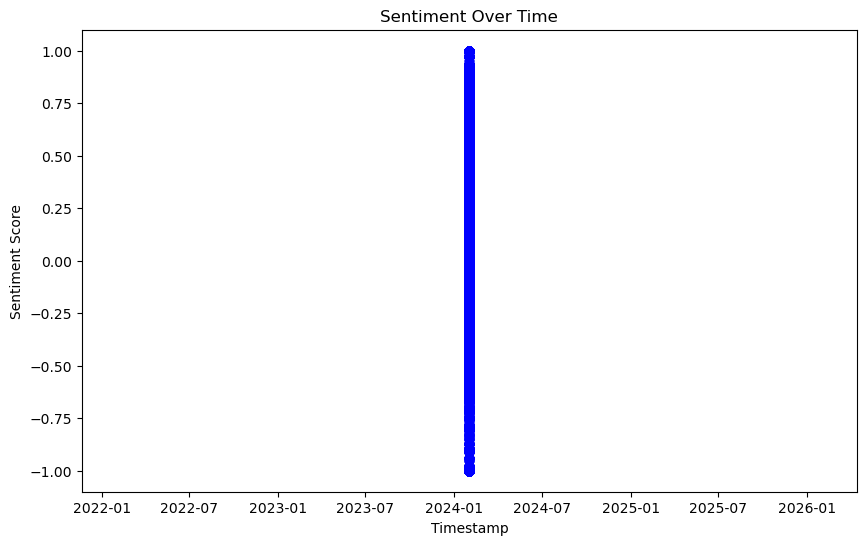

In [11]:
# Assuming you have a 'timestamp' column, if not, you may need to create one
tweets['timestamp'] = pd.to_datetime('now')

# Identify the correct column name for the text data and replace 'text' with the actual column name
tweets['sentiment'] = tweets['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Time series plot
plt.figure(figsize=(10, 6))
plt.plot(tweets['timestamp'], tweets['sentiment'], marker='o', linestyle='-', color='blue')
plt.title('Sentiment Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.show()

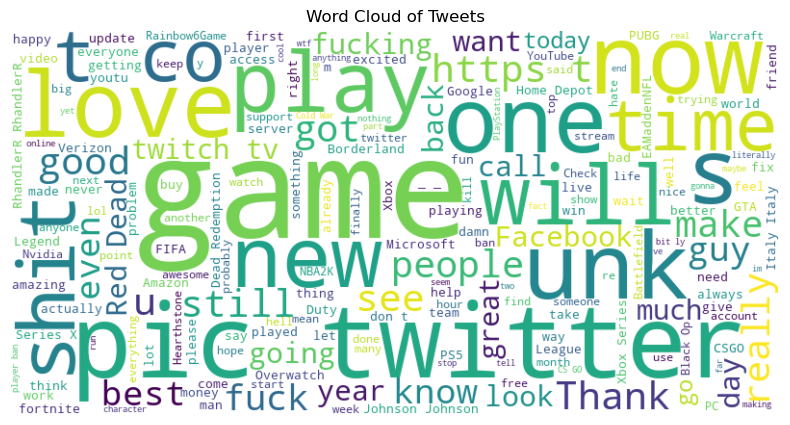

In [12]:
from wordcloud import WordCloud

text_data = ' '.join(tweets['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()